In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 50
pd.set_option('max_columns', 50)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
sns.set(style='ticks', context='talk')
sns.set(rc={"figure.figsize": (10, 10)})

More magic:
  
`%alias_magic t time`<br>
`?str.replace()`<br>
`%run ./two-histograms.ipynb`<br>
`!ls`<br>
`%lsmagic`<br>

Also https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [3]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

# 14.1 Counting Time Zones in Pure Python

In [4]:
frame = pd.DataFrame(records)
del frame['_heartbeat_']
frame.head()

,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [5]:
top_zones = frame.tz.value_counts().head(10)
top_zones


America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

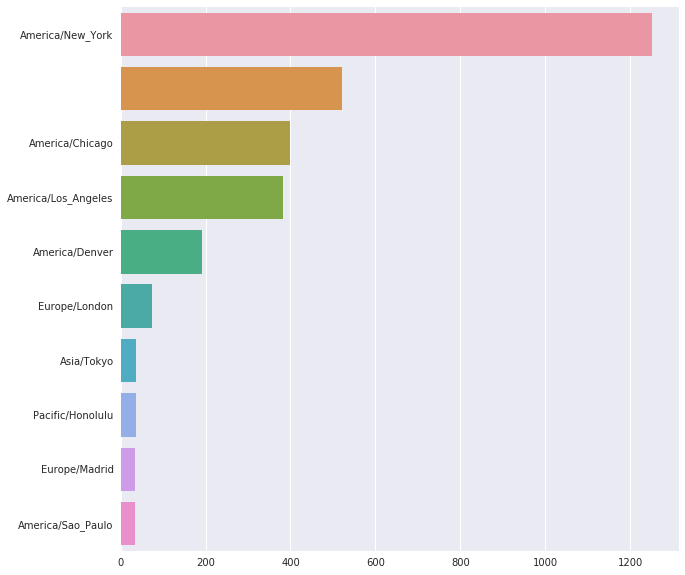

In [6]:
sns.barplot(x=top_zones.values, y=top_zones.index);

In [7]:
cframe = frame.copy()
cframe['os'] = np.where(frame.a.str.contains('Windows'), 'Windows', 'Not Windows')
g = cframe.groupby(['tz', 'os']).size().unstack().fillna(0)
g.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [8]:
g.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [9]:
g2 = g.copy()
g2['total'] = g2.sum(axis=1)
g2 = g2.sort_values('total', ascending=False)
g2 = g2.stack()
g2.name = 'total'
g2 = g2.reset_index()
g2 = g2[g2.os != 'total']
g2.head(10)

,tz,os,total
0,America/New_York,Not Windows,339.0
1,America/New_York,Windows,912.0
3,,Not Windows,245.0
4,,Windows,276.0
6,America/Chicago,Not Windows,115.0
7,America/Chicago,Windows,285.0
9,America/Los_Angeles,Not Windows,130.0
10,America/Los_Angeles,Windows,252.0
12,America/Denver,Not Windows,132.0
13,America/Denver,Windows,59.0


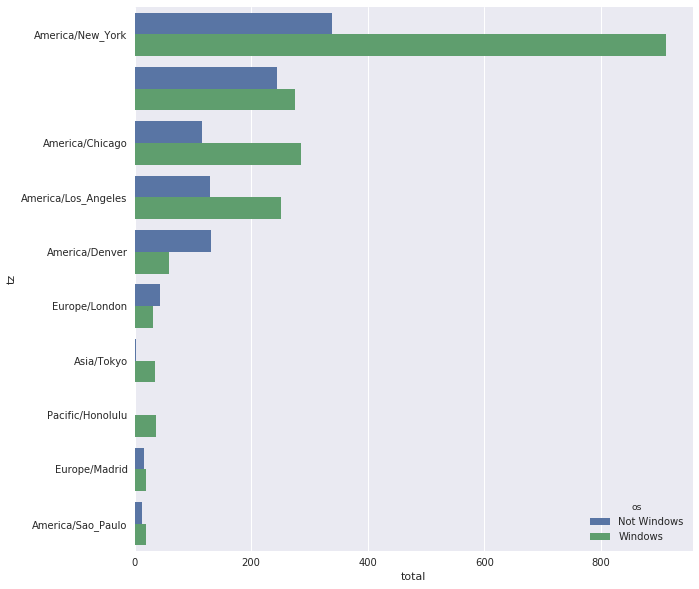

In [10]:
sns.barplot(x='total', y='tz', hue='os', data=g2.head(20));

# 14.2 MovieLens 1M Dataset

In [11]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep=r'::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep=r'::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep=r'::', header=None, names=mnames, engine='python')

In [12]:
users.head()
ratings.head()
movies.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
data = pd.merge(pd.merge(users, ratings), movies)
data.head()
data.tail()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [14]:
data[['title', 'gender', 'rating']].groupby(['title', 'gender']).mean().unstack().head()

rating          
gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [15]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [16]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles.to_frame().head()

,title
title,
"'burbs, The (1989)","'burbs, The (1989)"
10 Things I Hate About You (1999),10 Things I Hate About You (1999)
101 Dalmatians (1961),101 Dalmatians (1961)
101 Dalmatians (1996),101 Dalmatians (1996)
12 Angry Men (1957),12 Angry Men (1957)


In [18]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [19]:
mean_ratings.sort_values('F', ascending=False).head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [20]:
mean_ratings['diff'] = mean_ratings.M - mean_ratings.F
sorted_by_diff = mean_ratings.sort_values('diff')
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [21]:
sorted_by_diff.head(10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [22]:
sorted_by_diff.tail(10)

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


In [23]:
std_rating = data.groupby('title')['rating'].std()
std_rating.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [24]:
std_rating[active_titles].sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 14.3 US Baby Names 1880–2010

In [25]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [26]:
names1880.groupby('sex').sum().head()

,births
sex,
F,90993
M,110493


In [27]:
pieces = []
for year in range(1880, 2011):
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [28]:
names.shape

(1690784, 4)

In [29]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


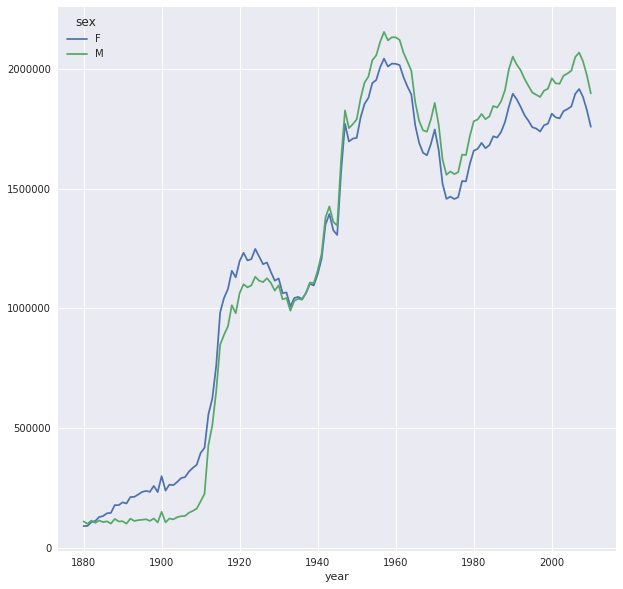

In [30]:
total_births.plot();

In [31]:
def add_prop(group):
    group['prop'] = names.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [32]:
names.groupby(['year', 'sex']).prop.sum().head()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

In [33]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000 = top1000.reset_index(drop=True)
top1000.head()
top1000.tail()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


,name,sex,births,year,prop
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102
261876,Maxton,M,193,2010,0.000102


In [34]:
top1000.shape
names.shape

(261877, 5)

(1690784, 5)

In [35]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [36]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abigail,Abigale,Abigayle,Abner,Abraham,Abram,...,Zenia,Zennie,Zeno,Zenobia,Zeta,Zetta,Zettie,Zhane,Zigmund,Zillah,Zilpah,Zilpha,Zina,Zion,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,NaN,NaN,NaN,50.0,9.0,NaN,12.0,NaN,NaN,27.0,81.0,21.0,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,NaN,NaN,NaN,36.0,12.0,NaN,8.0,NaN,NaN,30.0,86.0,30.0,...,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,NaN,NaN,NaN,50.0,10.0,NaN,14.0,NaN,NaN,32.0,91.0,25.0,...,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12.0,NaN,11.0,NaN,NaN,27.0,52.0,20.0,...,NaN,NaN,6.0,5.0,NaN,15.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,45.0,14.0,NaN,13.0,NaN,NaN,33.0,67.0,29.0,...,NaN,NaN,NaN,NaN,NaN,10.0,9.0,NaN,NaN,NaN,NaN,6.0,7.0,NaN,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


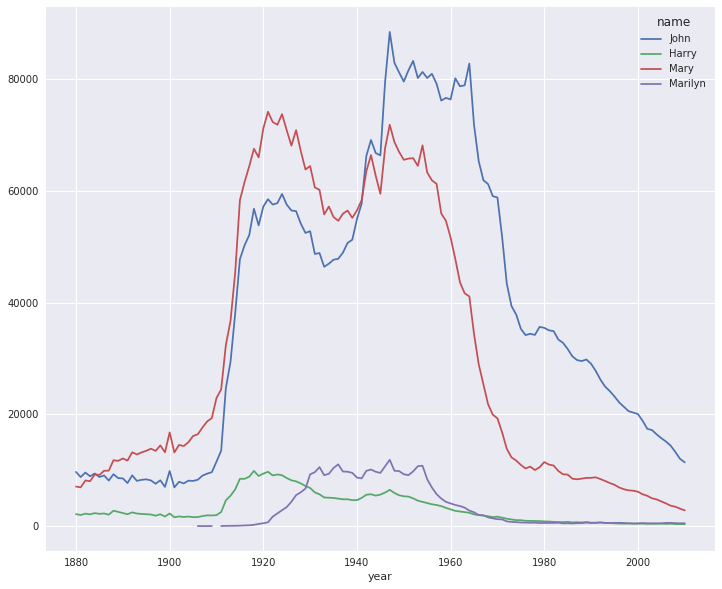

In [37]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(figsize=(12, 10), subplots=False);

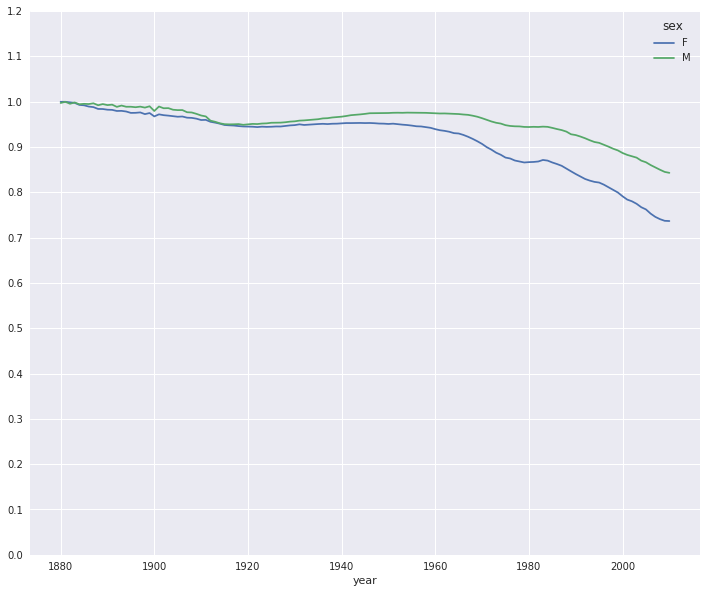

In [38]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
table.plot(yticks=np.linspace(0, 1.2, 13), figsize=(12, 10));

In [39]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values('prop', ascending=False).prop.cumsum()
prop_cumsum.head()
prop_cumsum.values.searchsorted(0.5)

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
Name: prop, dtype: float64

116

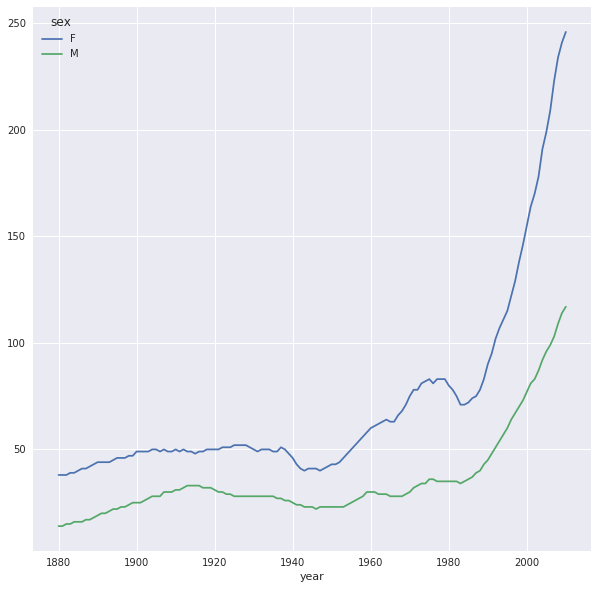

In [40]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity.unstack().plot();

In [41]:
last_letters = names.name.map(lambda x: x[-1])
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc='sum')
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                                                         \
year            1887     1888     1889     1890     1891     1892     1893   
last_letter                                                                  
a            48942.0  59442.0  58631.0  62313.0  60582.0  68331.0  67821.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
d             1027.0   1298.0   1374.0   1438.0   1512.0   1775.0   1821.0   
e            54353.0  66750.0  66663.0  70948.0  67750.0  77186.0  76455.0   

sex                                                                          \
year            1894     1895     1896     1897     1898     1899      1900   
last_letter                                                                   
a            70631.0  73002.0  73584.0  72148.0  79150.0  70712.0   89934.0   
b                NaN      NaN      NaN      NaN      NaN      NaN       NaN   
c                NaN      NaN      5.0      NaN      NaN      NaN       NaN   
d             1985.0   2268.0   2372.0   2455.0   2953.0   3028.0    3670.0   
e            79938.0  83875.0  84355.0  82783.0  91151.0  81395.0  107080.0   

sex                                                ...            M            \
year            1901     1902     1903     1904    ...         1986      1987   
last_letter                                        ...                          
a            72186.0  77816.0  77130.0  80201.0    ...      44776.0   47522.0   
b                NaN      NaN      NaN      NaN    ...      16479.0   17731.0   
c                NaN      NaN      NaN      NaN    ...      27177.0   27963.0   
d             3146.0   3499.0   3844.0   4260.0    ...     108526.0  107076.0   
e            83223.0  92643.0  90666.0  94631.0    ...     125673.0  126461.0   

sex                                                                      \
year             1988      1989      1990      1991      1992      1993   
last_letter                                                               
a             50337.0   54098.0   52158.0   50977.0   47271.0   45592.0   
b             19708.0   23123.0   27942.0   32179.0   32837.0   35817.0   
c             28099.0   27549.0   28951.0   28259.0   27252.0   26423.0   
d            105127.0  105727.0  101968.0   93858.0   87586.0   82541.0   
e            130176.0  139160.0  146489.0  146218.0  149738.0  147895.0   

sex                                                                      \
year             1994      1995      1996      1997      1998      1999   
last_letter                                                               
a             44441.0   44991.0   42739.0   41458.0   41281.0   40608.0   
b             38226.0   40717.0   42791.0   46177.0   50330.0   50051.0   
c             26912.0   26330.0   26270.0   25848.0   26624.0   26160.0   
d             77163.0   72313.0   70157.0   69036.0   67683.0   65507.0   
e            145682.0  140838.0  142438.0  141857.0  144854.0  145047.0   

sex                                                                      \
year             2000      2001      2002      2003      2004      2005   
last_letter                                                               
a             40837.0   39124.0   38815.0

In [42]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [43]:
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

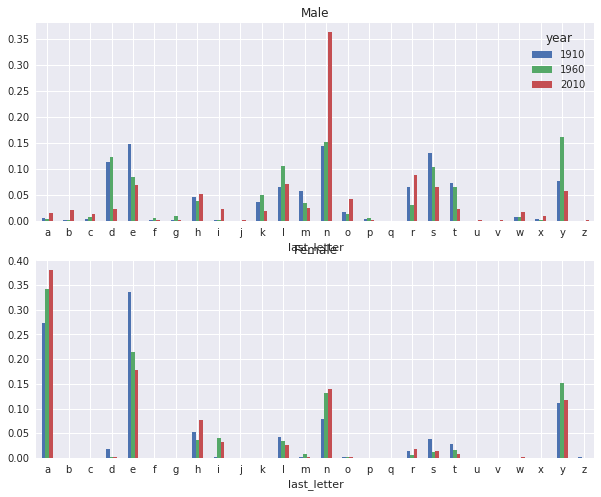

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male');
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False);

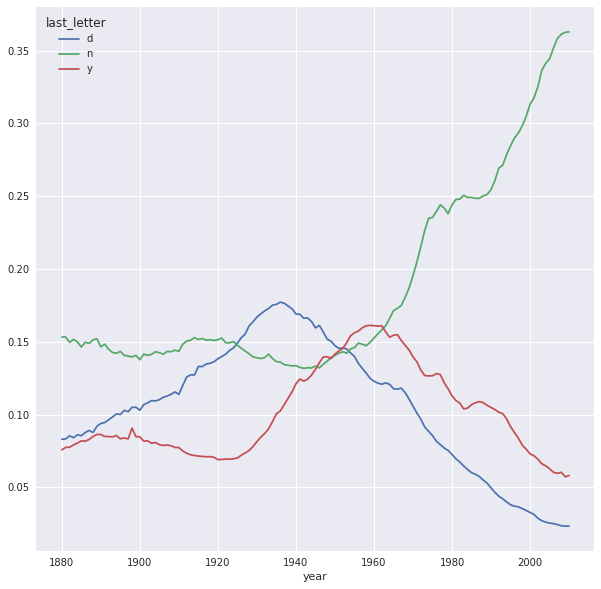

In [45]:
full_prop = table / table.sum()
t = full_prop.loc[['d', 'n', 'y'], 'M'].T
t.head()
t.plot();

In [46]:
all_names = pd.Series(top1000.name.unique())
all_names.head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
dtype: object

In [47]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [48]:
t = top1000
t = t[t.name.isin(lesley_like)]
t.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

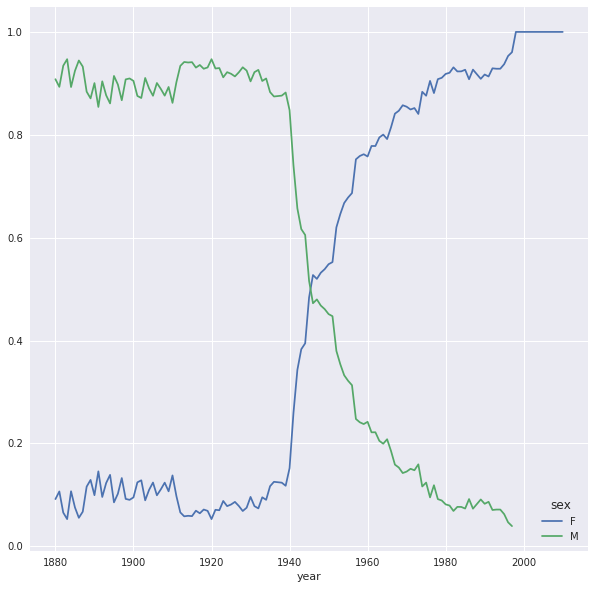

In [49]:
p = t.pivot_table('births', index='year', columns='sex', aggfunc='sum')
p = p.div(p.sum(1), axis=0)
p.head()
p.plot();

# USDA Food Database

In [50]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [51]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [52]:
info.group.value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [53]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [54]:
nutrients.head()
nutrients.shape

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


(389355, 5)

In [55]:
nutrients.duplicated().sum()

14179

In [56]:
nutrients = nutrients.drop_duplicates()
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [57]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()

col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [58]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata.head()
ndata.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


(375176, 8)

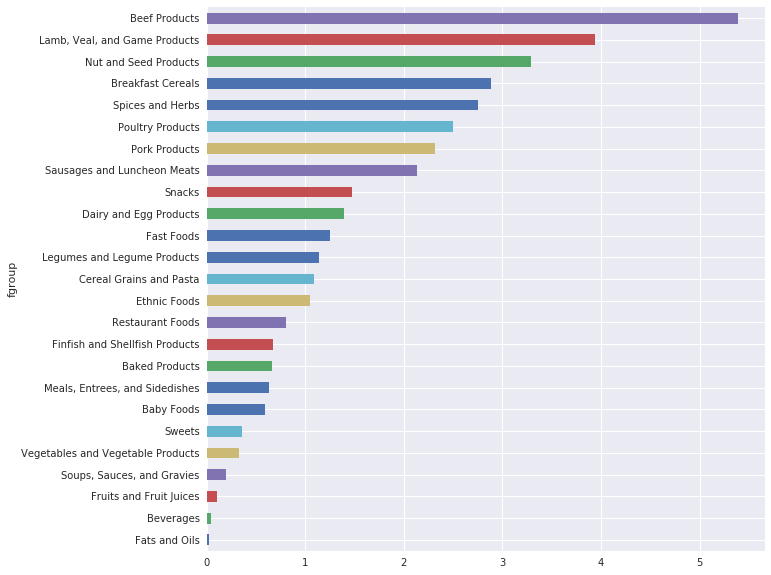

In [59]:
medians = ndata.groupby(['nutrient', 'fgroup'])['value'].agg('median')
medians['Zinc, Zn'].sort_values().plot(kind='barh');

In [60]:
ndata.groupby(['nutgroup', 'nutrient']).apply(lambda x: x.loc[x.value.idxmax()])[['value', 'food']].head(20)

value  \
nutgroup    nutrient                   
Amino Acids Alanine            8.009   
            Arginine           7.436   
            Aspartic acid     10.203   
            Cystine            1.307   
            Glutamic acid     17.452   
            Glycine           19.049   
            Histidine          2.999   
            Hydroxyproline     0.803   
            Isoleucine         4.300   
            Leucine            7.200   
            Lysine             6.690   
            Methionine         1.859   
            Phenylalanine      4.600   
            Proline           12.295   
            Serine             4.600   
            Threonine          3.300   
            Tryptophan         1.600   
            Tyrosine           3.300   
            Valine             4.500   
Composition Adjusted Protein  12.900   

                                                                           food  
nutgroup    nutrient                                                             
Amino Acids Alanine                           Gelatins, dry powder, unsweetened  
            Arginine                               Seeds, sesame flour, low-fat  
            Aspartic acid                                   Soy protein isolate  
            Cystine                Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                   Soy protein isolate  
            Glycine                           Gelatins, dry powder, unsweetened  
            Histidine                Whale, beluga, meat, dried (Alaska Native)  
            Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...  
            Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...  
            Methionine                    Fish, cod, Atlantic, dried and salted  
            Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Proline                           Gelatins, dry powder, unsweetened  
            Serine            Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Threonine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Tryptophan         Sea lion, Steller, meat with fat (Alaska Native)  
            Tyrosine          Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Valine            Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
Composition Adjusted Protein             Baking chocolate, unsweetened, squares

# 2012 Federal Election Commission Database

In [61]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv', low_memory=False)
fec.head()
fec.shape

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


(1001731, 16)

In [62]:
fec.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [63]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [64]:
fec['party'] = fec.cand_nm.map(parties)
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [65]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [66]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [67]:
fec[fec.contb_receipt_amt < 0].head()
fec[fec.contb_receipt_amt < 0].mean()['contb_receipt_amt']

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
41,C00410118,P20002978,"Bachmann, Michelle","MINNIS, RITA",MILPITAS,CA,950357610,NaN,NaN,-1500.0,20-JUN-11,Refund,NaN,NaN,SB28A,736166,Republican
264,C00410118,P20002978,"Bachmann, Michelle","BISHOP, GERARD",WESTHAMPTON BEACH,NY,119780366,NaN,NaN,-1700.0,28-JUN-11,Refund,NaN,NaN,SB28A,736166,Republican
752,C00431171,P80003353,"Romney, Mitt","KNIGHT, RENA",MERIDIANVILLE,AL,35759,NaN,NaN,-60.0,07-MAR-12,Refund,NaN,NaN,SB28A,780128,Republican
885,C00431171,P80003353,"Romney, Mitt","HENDERSON, RONALD E. DR.",MOUNTAIN BRK,AL,352132325,RETIRED,RETIRED,-150.0,06-FEB-12,REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,780124,Republican
1033,C00431171,P80003353,"Romney, Mitt","SELLERS, LEE",MONTGOMERY,AL,36111,NaN,NaN,-120.0,20-JAN-12,Refund,NaN,NaN,SB28A,771933,Republican


-1117.4414947652137

In [68]:
fec = fec[fec.contb_receipt_amt > 0]

In [69]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo.head()
fec_mrbo.shape

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


(694282, 17)

In [70]:
fec.contbr_occupation.value_counts().head(10)

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [71]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec.contbr_occupation.value_counts().head(10)

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

In [72]:
fec.contbr_employer.value_counts().head(10)

RETIRED                                   206675
SELF-EMPLOYED                              94505
NOT EMPLOYED                               45877
INFORMATION REQUESTED                      36135
SELF                                       24385
INFORMATION REQUESTED PER BEST EFFORTS     22260
NONE                                       19929
HOMEMAKER                                  18269
SELF EMPLOYED                               6274
REQUESTED                                   4233
Name: contbr_employer, dtype: int64

In [73]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'NONE': 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
    'NOT EMPLOYED': 'UNEMPLOYED',
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)
fec.contbr_employer.value_counts().head(10)

RETIRED              206675
SELF-EMPLOYED        125164
NOT PROVIDED          78325
UNEMPLOYED            48391
HOMEMAKER             18269
REQUESTED              4233
US ARMY                1817
STUDENT                1786
OBAMA FOR AMERICA      1741
IBM                    1428
Name: contbr_employer, dtype: int64

In [74]:
by_occupation = fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
by_occupation.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [75]:
over_2m = by_occupation[by_occupation.sum(1) > 2000000]
over_2m
over_2m.shape

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


(17, 2)

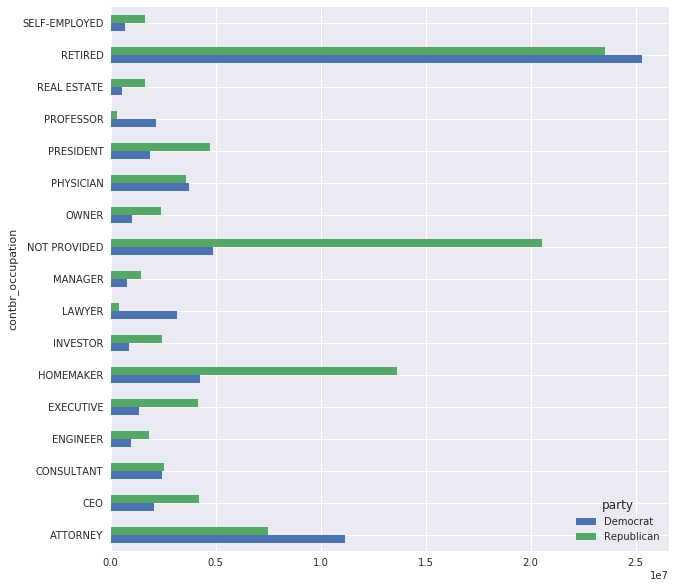

In [76]:
over_2m.plot(kind='barh');

In [77]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [78]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [79]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
              ...      
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (10, 100]
701367        (10, 100]
701368      (100, 1000]
701369        (10, 100]
701370        (10, 100]
701371        (10, 100]
701372        (10, 100]
701373        (10, 100]
701374        (10, 100]
701375        (10, 100]
701376    (1000,

In [80]:
g = fec_mrbo.groupby(['cand_nm', labels])
g.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [81]:
bucket_sums = g.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


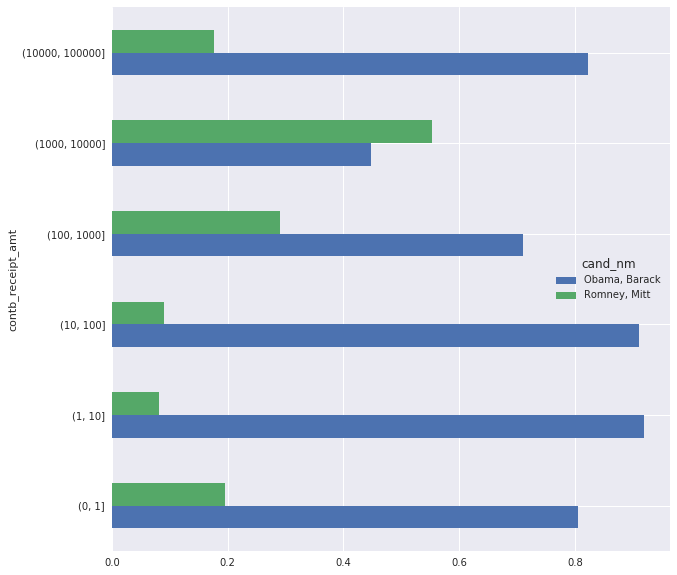

In [82]:
normed_sums[:-2].plot(kind='barh');

In [83]:
g = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
g = g.contb_receipt_amt.sum().unstack(0)
totals = g.fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


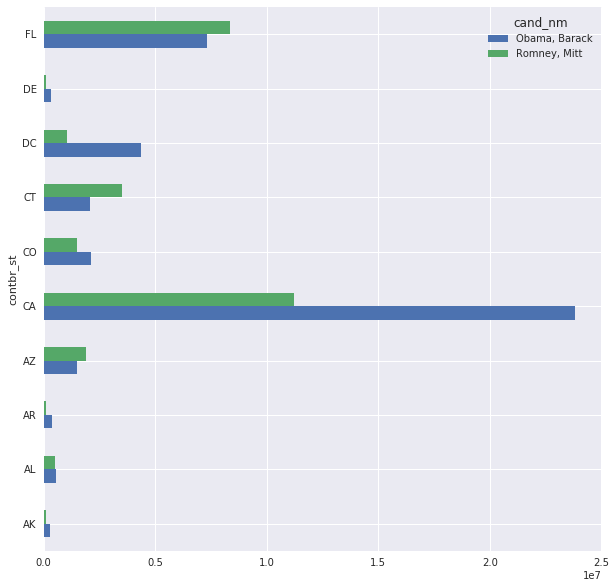

In [84]:
totals[:10].plot(kind='barh');

In [85]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
